In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
tenure = []
for value in data['Tenure']:
    if((value >= 0) and (value < 3)):
        value = 'Low'
        tenure.append(value)
    elif((value >= 3) and (value <= 6)):
        value = 'Moderate'
        tenure.append(value)
    else:
        value = 'High'
        tenure.append(value)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

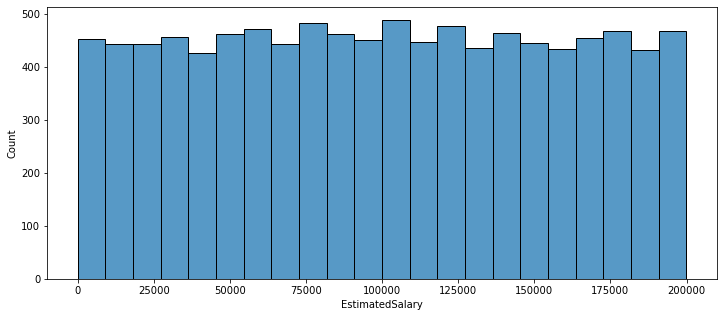

In [5]:
figure(figsize = (12, 5))
sns.histplot(data, x = 'EstimatedSalary')

In [6]:
data['EstimatedSalary'].quantile([0.25, 0.75])

0.25     51002.1100
0.75    149388.2475
Name: EstimatedSalary, dtype: float64

In [7]:
sal_class = []
for value in data['EstimatedSalary']:
    if(value <= 50000):
        value = 'Low'
        sal_class.append(value)
    elif((value > 50000) and (value <= 150000)):
        value = 'Moderate'
        sal_class.append(value)
    else:
        value = 'High'
        sal_class.append(value)

In [8]:
tenure = pd.Series(tenure)

In [9]:
sal_class = pd.Series(sal_class)

In [10]:
data = pd.concat([data, sal_class.rename('sal_class')], axis = 1)

In [11]:
data = pd.concat([data, tenure.rename('tenure_class')], axis = 1)

In [12]:
data['Est_sal_ratio'] = data['EstimatedSalary']/data['EstimatedSalary'].median()

In [13]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,sal_class,tenure_class,Est_sal_ratio
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Moderate,Low,1.011527
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Moderate,Low,1.123248
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Moderate,High,1.137111
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Moderate,Low,0.936450
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Moderate,Low,0.789310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Moderate,Moderate,0.960843
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Moderate,High,1.015029
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Low,High,0.420041
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Moderate,Moderate,0.927087


In [14]:
data['tenure_class'].head(10)

0         Low
1         Low
2        High
3         Low
4         Low
5        High
6        High
7    Moderate
8    Moderate
9         Low
Name: tenure_class, dtype: object

In [15]:
mod = data.iloc[2]
data.iloc[2] = data.iloc[7]
data.iloc[7] = mod

In [16]:
print(data['tenure_class'].head())
print("-------------------------")
print(data['sal_class'].head())

0         Low
1         Low
2    Moderate
3         Low
4         Low
Name: tenure_class, dtype: object
-------------------------
0    Moderate
1    Moderate
2    Moderate
3    Moderate
4    Moderate
Name: sal_class, dtype: object


In [17]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,sal_class,tenure_class,Est_sal_ratio
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Moderate,Low,1.011527
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Moderate,Low,1.123248
2,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Moderate,Moderate,1.191159
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Moderate,Low,0.936450
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Moderate,Low,0.789310


In [18]:
data.iloc[1], data.iloc[7] = data.iloc[7], data.iloc[1]
data.iloc[0], data.iloc[16] = data.iloc[16], data.iloc[0]

In [19]:
data.iloc[2], data.iloc[5] = data.iloc[5], data.iloc[2]


In [20]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,sal_class,tenure_class,Est_sal_ratio
0,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,Low,Low,0.050878
1,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Moderate,High,1.137111
2,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Moderate,High,1.494669
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Moderate,Low,0.936450
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Moderate,Low,0.789310


In [21]:
# Checking for null values:
for col in data.columns:
    print(f'{col}: {(data[col].loc[data[col].isnull() == True].shape[0])/data[col].shape[0]*100}%')

RowNumber: 0.0%
CustomerId: 0.0%
Surname: 0.0%
CreditScore: 0.0%
Geography: 0.0%
Gender: 0.0%
Age: 0.0%
Tenure: 0.0%
Balance: 0.0%
NumOfProducts: 0.0%
HasCrCard: 0.0%
IsActiveMember: 0.0%
EstimatedSalary: 0.0%
Exited: 0.0%
sal_class: 0.0%
tenure_class: 0.0%
Est_sal_ratio: 0.0%


In [22]:
data_copy = pd.read_csv('Churn_Modelling.csv')

<AxesSubplot:xlabel='CreditScore'>

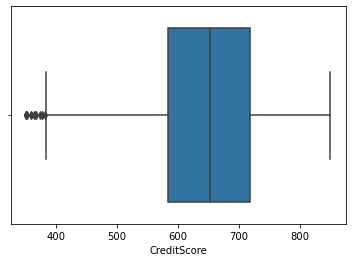

In [23]:
sns.boxplot(data = data_copy, x = 'CreditScore')

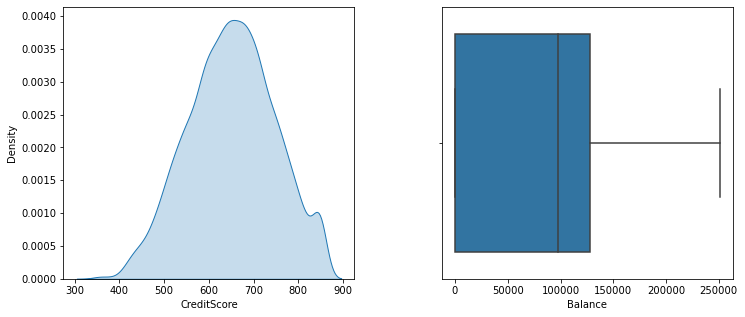

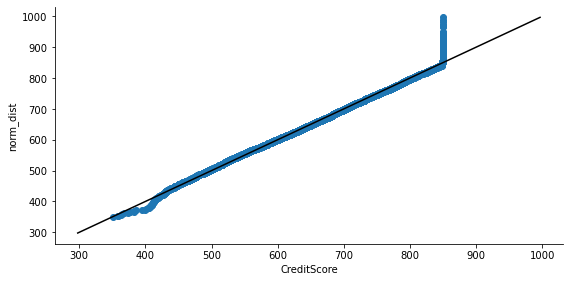

In [24]:
from seaborn_qqplot import pplot
from scipy.stats import norm
fig, axes_1 = plt.subplots(1,2, figsize = (12, 5))
plt.subplots_adjust(wspace=0.30, hspace=0.50)
sns.kdeplot(data = data_copy, x = 'CreditScore', fill = True, ax = axes_1[0])
sns.boxplot(data = data, x = 'Balance', ax = axes_1[1])
pplot(data = data_copy, x = 'CreditScore' , y = norm,kind = 'qq', height = 4, aspect = 2, display_kws = {'identity':True})


In [25]:
data_copy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
data_copy = data_copy.drop(data_copy.columns[:3], axis = 1)
data_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
iqr = data_copy['CreditScore'].quantile(0.75) - data_copy['CreditScore'].quantile(0.25)
cred_outliers = data_copy['CreditScore'][data_copy['CreditScore'] < data_copy['CreditScore'].quantile(0.25) - (1.5*iqr)]
cred_no_out = data_copy['CreditScore'][data_copy['CreditScore'] < 385]

<AxesSubplot:xlabel='CreditScore'>

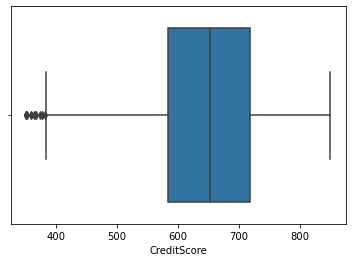

In [28]:
sns.boxplot(data = data_copy, x = 'CreditScore')

In [29]:
data_copy = data_copy.drop(cred_outliers.index, axis = 0)

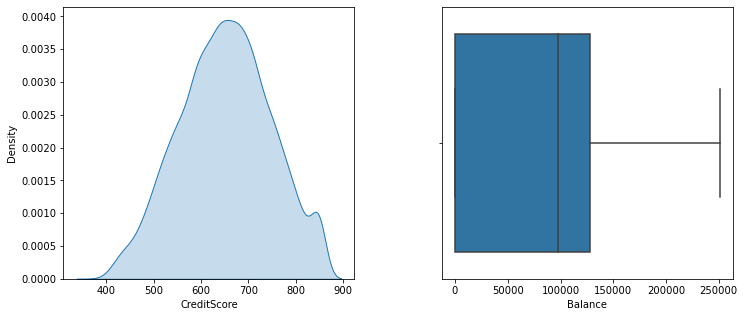

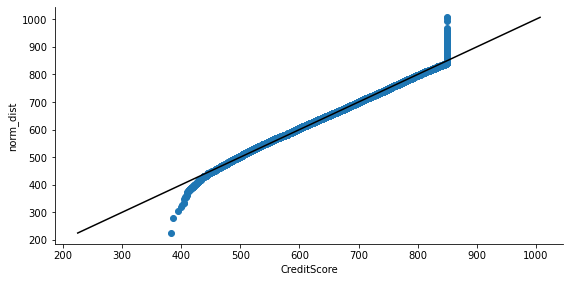

In [30]:
from seaborn_qqplot import pplot
from scipy.stats import norm
fig, axes_1 = plt.subplots(1,2, figsize = (12, 5))
plt.subplots_adjust(wspace=0.30, hspace=0.50)
sns.kdeplot(data = data_copy, x = 'CreditScore', fill = True, ax = axes_1[0])
sns.boxplot(data = data, x = 'Balance', ax = axes_1[1])
pplot(data = data_copy, x = 'CreditScore' , y = norm,kind = 'qq', height = 4, aspect = 2, display_kws = {'identity':True})

## Analysis

<h2> For the analysis we first see that we have data from three different nations: Germany, Spain, France.<br>
Due to the cultural differences, it makes sense that we make conclusions for each nation instead of making any conclusion on the whole dataset without taking into the account the geography</h2>

In [31]:
import plotly.express as px
px.histogram(data, x = data['Geography'], color = data['tenure_class'])

In [32]:
import plotly.express as px
px.histogram(data, x = data['Geography'], color = data['Exited'] )

1. Out of the total churned customers, 32% German and 16% French Customers have churned, and nearly 17% Spanish Customers have churned.<br>
So German customers don't seem to be satisfied with the services


In [33]:
px.histogram(data, x = data['Geography'], color = data['sal_class'] )

In [34]:
temp_1 = data[data['Exited'] == 1]
temp_2 = data[data['Exited'] == 0]

In [35]:
px.histogram(temp_1, x = temp_1['Geography'], color = temp_1['sal_class'], title = 'Salary Class in different regions among the customers who Churned' )

In [36]:
px.histogram(temp_2, x = temp_2['Geography'], color = temp_2['sal_class'], title = 'Salary Class in different regions among the customers who not Churned' )

In [37]:
data_ger = data.loc[data['Geography'] == 'Germany']
data_fra = data.loc[data['Geography'] == 'France']
data_esp = data.loc[data['Geography'] == 'Spain']

for clas in sal_class.unique():
    print(f"In Germany {clas}: {data_ger.loc[(data_ger['sal_class'] == clas) & (data_ger['Exited'] == 1)].shape[0]/data_ger.loc[(data_ger['sal_class'] == clas)].shape[0]*100}")
    print(f"In France {clas}: {data_fra.loc[(data_fra['sal_class'] == clas) & (data_fra['Exited'] == 1)].shape[0]/data_fra.loc[(data_fra['sal_class'] == clas)].shape[0]*100}")
    print(f"In Spain {clas}: {data_esp.loc[(data_esp['sal_class'] == clas) & (data_esp['Exited'] == 1)].shape[0]/data_esp.loc[(data_esp['sal_class'] == clas)].shape[0]*100}")
    print('-'*50)



In Germany Moderate: 31.687898089171973
In France Moderate: 16.140350877192983
In Spain Moderate: 16.443745082612114
--------------------------------------------------
In Germany Low: 35.714285714285715
In France Low: 14.48445171849427
In Spain Low: 14.959349593495935
--------------------------------------------------
In Germany High: 30.76923076923077
In France High: 17.84841075794621
In Spain High: 18.95093062605753
--------------------------------------------------


2. In France and Spain, the customer churn distributed by Salary Class is less than 20% of their respective class, but in Germany it is greater than 30%, high proportion of churning among the high Salary class customers show prices of company products may not be the only reason for the Churn

In [38]:
data_ger_cred = data.drop(cred_outliers.index, axis = 0)
data_ger_cred = data_ger_cred.loc[data_ger_cred['Geography'] == 'Germany']

data_fra_cred = data.drop(cred_outliers.index, axis = 0)
data_fra_cred = data_fra_cred.loc[data_fra_cred['Geography'] == 'France']

data_esp_cred = data.drop(cred_outliers.index, axis = 0)
data_esp_cred = data_esp_cred.loc[data_esp_cred['Geography'] == 'Spain']

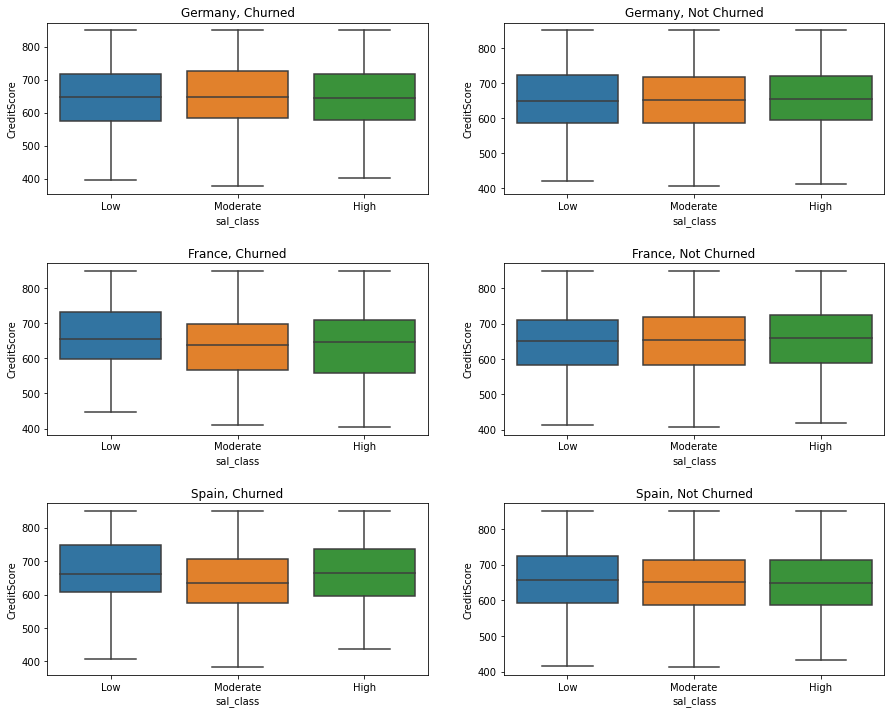

In [39]:
fig, axes = plt.subplots(3,2, figsize = (15,12))
sns.boxplot(data = data_ger_cred.loc[data_ger_cred['Exited'] == 1], x = 'sal_class', y = 'CreditScore', ax = axes[0][0], order = ['Low', 'Moderate', 'High'])
sns.boxplot(data = data_ger_cred.loc[data_ger_cred['Exited'] == 0], x = 'sal_class', y = 'CreditScore', ax = axes[0][1], order = ['Low', 'Moderate', 'High'])
axes[0][0].title.set_text('Germany, Churned')
axes[0][1].title.set_text('Germany, Not Churned')

sns.boxplot(data = data_fra_cred.loc[data_fra_cred['Exited'] == 1], x = 'sal_class', y = 'CreditScore', ax = axes[1][0], order = ['Low', 'Moderate', 'High'])
sns.boxplot(data = data_fra_cred.loc[data_fra_cred['Exited'] == 0], x = 'sal_class', y = 'CreditScore', ax = axes[1][1], order = ['Low', 'Moderate', 'High'])
axes[1][0].title.set_text('France, Churned')
axes[1][1].title.set_text('France, Not Churned')

sns.boxplot(data = data_esp_cred.loc[data_esp_cred['Exited'] == 1], x = 'sal_class', y = 'CreditScore', ax = axes[2][0], order = ['Low', 'Moderate', 'High'])
sns.boxplot(data = data_esp_cred.loc[data_esp_cred['Exited'] == 0], x = 'sal_class', y = 'CreditScore', ax = axes[2][1], order = ['Low', 'Moderate', 'High'])
axes[2][0].title.set_text('Spain, Churned')
axes[2][1].title.set_text('Spain, Not Churned')
plt.subplots_adjust(wspace=0.20, hspace=0.40)


3. Across all the nations, most of the customers have similar proportion of customers with good and bad for all the salary class

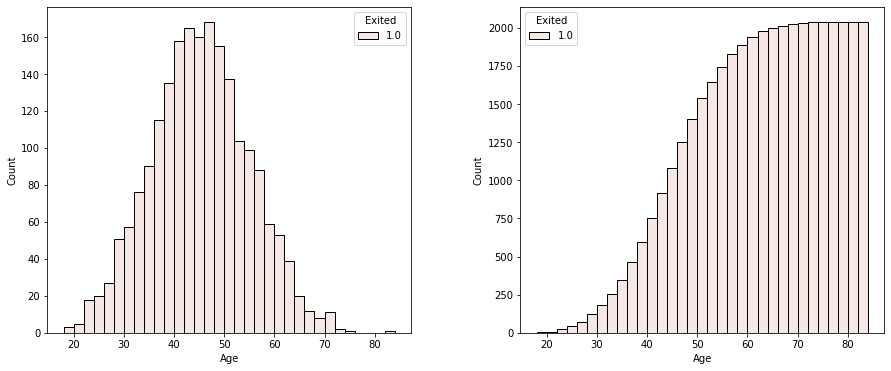

In [40]:
exit_0 = data['Exited'][data['Exited'] == 0]
exit_1 = data['Exited'][data['Exited'] == 1]

fig, axes = plt.subplots(1,2, figsize = (15, 6))
sns.histplot(data = data, x = 'Age', hue = exit_1, ax = axes[0])
sns.histplot(data, x = 'Age', hue = exit_1, ax = axes[1], cumulative = True)
plt.subplots_adjust(wspace=0.30, hspace=0.30)

# Exited vs Estimated Salary
# CreditScore vs Balance

4. We see that customers from the age group 40 - 50 constitute 43% of the total number of churns. <br>
So we can create provide some services directed at these age groups so they don't leave.

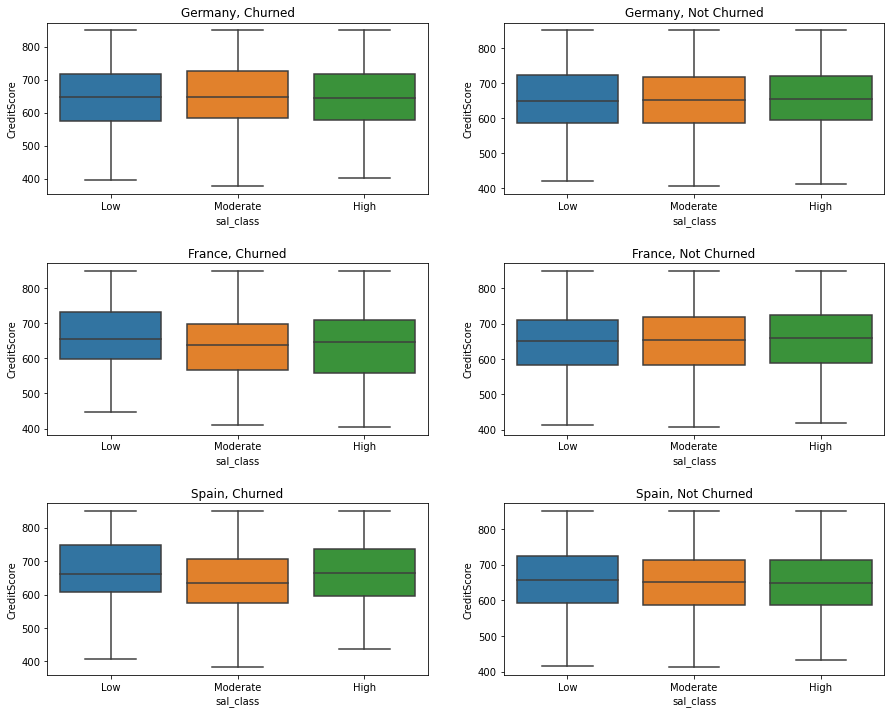

In [41]:
fig, axes = plt.subplots(3,2, figsize = (15,12))
sns.boxplot(data = data_ger_cred.loc[data_ger_cred['Exited'] == 1], x = 'sal_class', y = 'CreditScore', ax = axes[0][0], order = ['Low', 'Moderate', 'High'])
sns.boxplot(data = data_ger_cred.loc[data_ger_cred['Exited'] == 0], x = 'sal_class', y = 'CreditScore', ax = axes[0][1], order = ['Low', 'Moderate', 'High'])
axes[0][0].title.set_text('Germany, Churned')
axes[0][1].title.set_text('Germany, Not Churned')

sns.boxplot(data = data_fra_cred.loc[data_fra_cred['Exited'] == 1], x = 'sal_class', y = 'CreditScore', ax = axes[1][0], order = ['Low', 'Moderate', 'High'])
sns.boxplot(data = data_fra_cred.loc[data_fra_cred['Exited'] == 0], x = 'sal_class', y = 'CreditScore', ax = axes[1][1], order = ['Low', 'Moderate', 'High'])
axes[1][0].title.set_text('France, Churned')
axes[1][1].title.set_text('France, Not Churned')

sns.boxplot(data = data_esp_cred.loc[data_esp_cred['Exited'] == 1], x = 'sal_class', y = 'CreditScore', ax = axes[2][0], order = ['Low', 'Moderate', 'High'])
sns.boxplot(data = data_esp_cred.loc[data_esp_cred['Exited'] == 0], x = 'sal_class', y = 'CreditScore', ax = axes[2][1], order = ['Low', 'Moderate', 'High'])
axes[2][0].title.set_text('Spain, Churned')
axes[2][1].title.set_text('Spain, Not Churned')
plt.subplots_adjust(wspace=0.20, hspace=0.40)


5. In all the countries we see that out of those customers that churned, most of them belong to the age group 40 - 50 years, so the services of the bank might not be attractive to those age group, on the other hand customers who stayed mostly belong to the age group 20 - 40

In [42]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'sal_class',
       'tenure_class', 'Est_sal_ratio'],
      dtype='object')

In [43]:
temp = data.loc[(data['Age'] > 39) & (data['Age'] < 51)]
(temp.Exited[temp.Exited == 1].count()/data.Exited[data.Exited == 1].shape[0])*100

43.053510063819346

<h2> Data Preparation for Models</h2>

In [44]:
mod_data =  data_copy.drop(['Exited'], axis = 1)
target = data_copy['Exited']

In [45]:
pd.Series(data_copy.columns)

0         CreditScore
1           Geography
2              Gender
3                 Age
4              Tenure
5             Balance
6       NumOfProducts
7           HasCrCard
8      IsActiveMember
9     EstimatedSalary
10             Exited
dtype: object

In [46]:
cat_indices = [1,2,7,8]
from imblearn.over_sampling import SMOTENC
X = mod_data
y = target
smote_nc = SMOTENC(categorical_features = cat_indices, random_state = 0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

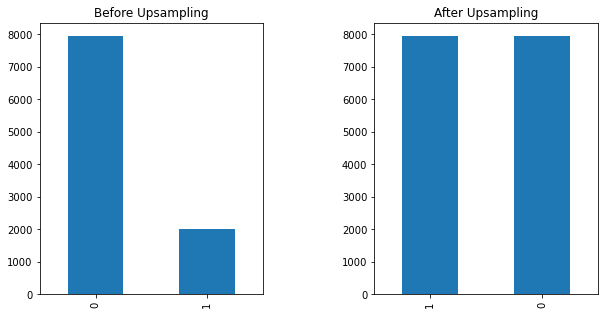

In [47]:
fig_up, ax_up = plt.subplots(1, 2, figsize = (10,5))
target_count = data_copy['Exited'].value_counts()
target_count_2 = y_resampled.value_counts()
target_count.plot(kind = 'bar', title = 'Before Upsampling', ax = ax_up[0])
target_count_2.plot(kind = 'bar',title = 'After Upsampling', ax = ax_up[1])
plt.subplots_adjust(wspace=0.50, hspace=0.30)

In [48]:
#OHE Encoding
data_ohe =  pd.get_dummies(X_resampled, columns = ['Gender', 'Geography', 'IsActiveMember', 'HasCrCard'])
data_ohe = pd.concat([data_ohe, y_resampled], axis = 1)

In [49]:
data_ohe.columns[:6]

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

In [50]:
data_ohe_copy = data_ohe.copy()

In [51]:
colnames = data_ohe.columns[:6]
features = data_ohe_copy[colnames]

In [52]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.values)

In [53]:
data_ohe_copy[colnames] = scaled_features

In [54]:
data_ohe_copy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,IsActiveMember_0,IsActiveMember_1,HasCrCard_0,HasCrCard_1,Exited
0,-0.328224,0.098967,-1.032864,-1.339328,-0.730505,0.009501,1,0,1,0,0,0,1,0,1,1
1,-0.449537,-0.000695,-1.400062,0.033428,-0.730505,0.203151,1,0,0,0,1,0,1,1,0,0
2,-1.618556,0.098967,1.170327,1.275884,2.750649,0.227180,1,0,1,0,0,1,0,0,1,1
3,0.554054,-0.200018,-1.400062,-1.339328,1.010072,-0.120634,1,0,1,0,0,1,0,1,0,0
4,2.219353,0.198629,-1.032864,0.716514,-0.730505,-0.375679,1,0,0,0,1,0,1,0,1,0


In [55]:
data_ohe_copy.to_csv('Processed_Churn_data.csv')

In [56]:
dep_var = data_ohe_copy.iloc[:, 0:15]
churn = data_ohe_copy['Exited']

In [57]:
# Creating Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(dep_var, churn, random_state = 0)

<h2> Logistic Regression </h2>

In [58]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.519088
         Iterations 8


In [59]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                11944
Model:                          Logit   Df Residuals:                    11932
Method:                           MLE   Df Model:                           11
Date:                Mon, 26 Jul 2021   Pseudo R-squ.:                  0.2511
Time:                        15:02:42   Log-Likelihood:                -6200.0
converged:                       True   LL-Null:                       -8278.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0751      0.022     -3.392      0.001      -0.119      -0.032
Age                   0.8855      0.025     35.569      0.000       0.837       0.934
Tenure               -0.

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred_logistic = log_reg.predict(X_val)
prediction_logistic = list(map(round, pred_logistic))

cm = confusion_matrix(y_val, prediction_logistic) 
print("Confusion Matrix: \n", cm)
print('Accuracy on test_set: ', accuracy_score(y_val, prediction_logistic)*100)

Confusion Matrix: 
 [[1507  460]
 [ 452 1563]]
Accuracy on test_set:  77.09693621295831


In [61]:
from sklearn.model_selection import cross_val_score
X_cv = dep_var
y_cv = churn
model_cv = LogisticRegression()
cross_val = cross_val_score(model_cv, X_cv, y_cv, scoring='accuracy')
print(cross_val)
print(cross_val.mean()*100)

[0.69020716 0.74505495 0.78053375 0.77488226 0.7811617 ]
75.43679618740153


<h2> Random Forest </h2>

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

model_rf = RandomForestClassifier(random_state = 1)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_val)
cm_rf = confusion_matrix(y_val, preds_rf) 
print("Confusion Matrix: \n", cm_rf)
print("Accuracy on validation set: ", accuracy_score(preds_rf, y_val))

Confusion Matrix: 
 [[1673  294]
 [ 300 1715]]
Accuracy on validation set:  0.850828729281768


In [63]:
from sklearn.model_selection import cross_val_score
X_cv_rf = dep_var
y_cv_rf = churn
model_cv_rf = RandomForestClassifier()
cross_val = cross_val_score(model_cv_rf, X_cv_rf, y_cv_rf, scoring='accuracy')
print(cross_val)
print(cross_val.mean()*100)

[0.76993095 0.83736264 0.86373626 0.86656201 0.86436421]
84.03912131272907


<h2> To get the output many features have to be given in the input.<br>
We wish to reduce the number of features to be given in the input to the model with little to no reduce in the Accuracy of the model</h2>

<h2> Important features </h2>

<BarContainer object of 15 artists>

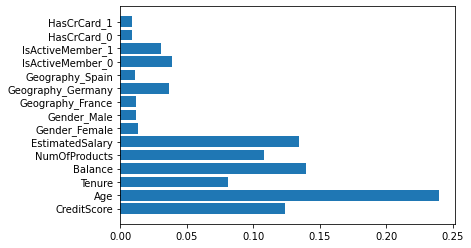

In [64]:
plt.barh(X_train.columns, model_rf.feature_importances_)

In [68]:
from sklearn.model_selection import cross_val_score
X_cv_rf = dep_var[['Age', 'NumOfProducts', 'EstimatedSalary', 'CreditScore', 'Balance', 'Tenure']]
y_cv_rf = churn
model_cv_rf = RandomForestClassifier(random_state=1)
cross_val = cross_val_score(model_cv_rf, X_cv_rf, y_cv_rf, scoring='accuracy')
print(cross_val)
print(cross_val.mean()*100)

[0.76993095 0.80847724 0.83076923 0.82260597 0.83076923]
81.2510522389457


In [69]:
# Testing performance of model for different values of n_estimators
X_cv_rf = dep_var[['Age', 'NumOfProducts', 'EstimatedSalary', 'CreditScore', 'Balance', 'Tenure']]
y_cv_rf = churn
estimates = [100, 500, 1000, 2000]

for n in estimates:
    model_cv_rf = RandomForestClassifier(random_state = 1, n_estimators = n)
    cross_val = cross_val_score(model_cv_rf, X_cv_rf, y_cv_rf, scoring='accuracy')
    print(cross_val)
    print(cross_val.mean()*100)
    print('--------------------\n')

[0.76993095 0.80847724 0.83076923 0.82260597 0.83076923]
81.2510522389457
--------------------

[0.77997489 0.80879121 0.83233909 0.82354788 0.83704867]
81.63403469456738
--------------------

[0.7787194  0.80973312 0.833281   0.82354788 0.83704867]
81.64660144805423
--------------------

[0.78123038 0.81287284 0.83296703 0.82480377 0.83736264]
81.784733247203
--------------------



In [65]:
# We choose 2000 as the value of the n_estimators for the model
model_pi = RandomForestClassifier(random_state=1, n_estimators = 2000)
model_pi = model_pi.fit(X_train[['Age', 'NumOfProducts', 'EstimatedSalary', 'CreditScore', 'Balance', 'Tenure']], y_train)

In [66]:
preds_mpi = model_pi.predict(X_val[['Age', 'NumOfProducts', 'EstimatedSalary', 'CreditScore', 'Balance', 'Tenure']])
print("Accuracy on validation set: ", accuracy_score(preds_mpi, y_val))


Accuracy on validation set:  0.811401305876444


<h2>Conclusions:<br></h2>

1. Out of the total churned customers, 32% German and 16% French Customers have churned, and nearly 17% Spanish Customers have churned.<br>
So German customers don't seem to be satisfied with the services<br>

2. In France and Spain, the customer churn distributed by Salary Class is less than 20% of their respective class, but in Germany it is greater than 30%, high proportion of churning among the high Salary class customers show prices of company products may not be the only reason for the Churn<br>

3. We see that customers from the age group 40 - 50 constitute 43% of the total number of churns.
So we can create provide some services directed at these age groups so they don't leave.<br>

4. In all the countries we see that out of those customers that churned, most of them belong to the age group 40 - 50 years, so the services of the bank might not be attractive to those age group, on the other hand customers who stayed mostly belong to the age group 20 - 40<br>

5. Among those who churned we see that proportion of customers with low credit score is relatively high than the other classes across different salary classes. But among those who didn't also we can see good proportion of customers with lower credit score
